# Script de modélisation

## Prise en compte des données

In [1]:
import pandas as pd
import numpy as np
import panel as pn

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('result_requetes.csv')
data.head()

,order_requests,nb_requete,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,1,1,859,134,58,valletta,30,portuguese,0,65736,Independant,Independant,0,0,0
1,1,1,719,155,97,valletta,30,portuguese,0,65736,Yin Yang,Royal Lotus,0,0,0
2,1,1,160,94,21,valletta,30,portuguese,0,65736,Independant,Independant,1,0,0
3,1,1,504,158,74,valletta,30,portuguese,0,65736,Morriott International,Morriot,0,0,0
4,1,1,295,73,21,valletta,30,portuguese,0,65736,Yin Yang,8 Premium,0,0,0


In [2]:
len(data)

39331

In [3]:
data.dtypes

order_requests      int64
nb_requete          int64
hotel_id            int64
price               int64
stock               int64
city               object
date                int64
language           object
mobile              int64
avatar_id           int64
group              object
brand              object
parking             int64
pool                int64
children_policy     int64
dtype: object

In [4]:
#On affecte le bon type aux variables qualitatives
data["city"]=pd.Categorical(data["city"],ordered=False)
data["language"]=pd.Categorical(data["language"],ordered=False)
data["group"]=pd.Categorical(data["group"],ordered=False)
data["brand"]=pd.Categorical(data["brand"],ordered=False)

data["mobile"]=pd.Categorical(data["mobile"],ordered=False)
data["parking"]=pd.Categorical(data["parking"],ordered=False)
data["pool"]=pd.Categorical(data["pool"],ordered=False)
data["children_policy"]=pd.Categorical(data["children_policy"],ordered=False)

data["hotel_id"]=pd.Categorical(data["hotel_id"],ordered=False)
data["avatar_id"]=pd.Categorical(data["avatar_id"],ordered=False)

data["price"]=pd.DataFrame(data["price"], dtype=float)

data.dtypes
#data.head()

order_requests        int64
nb_requete            int64
hotel_id           category
price               float64
stock                 int64
city               category
date                  int64
language           category
mobile             category
avatar_id          category
group              category
brand              category
parking            category
pool               category
children_policy    category
dtype: object

## Analyse de données

In [5]:
data.describe() #Indicateurs statistiques 1D pour les variables quantitatives

,order_requests,nb_requete,price,stock,date
count,39331.000000,39331.000000,39331.000000,39331.000000,39331.000000
mean,183.484173,1.638377,158.395744,33.425517,18.104320
std,103.155690,0.893626,82.003222,47.156864,12.496894
min,1.000000,1.000000,40.000000,0.000000,0.000000
25%,96.000000,1.000000,96.000000,3.000000,8.000000
50%,182.000000,1.000000,141.000000,14.000000,15.000000
75%,269.000000,2.000000,196.000000,45.000000,27.000000
max,363.000000,7.000000,522.000000,284.000000,44.000000


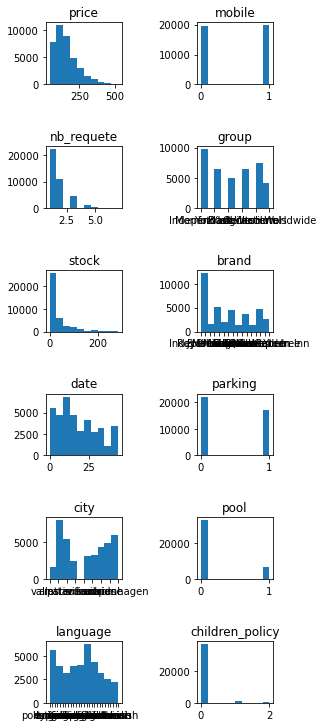

In [6]:
# Tracé des histogrammes
cm = 1/2.54
fig, ax = plt.subplots(6,2,figsize=(10*cm, 30*cm))
ax[0,0].hist(data["price"])
ax[0,0].set_title('price')
ax[1,0].hist(data["nb_requete"])
ax[1,0].set_title('nb_requete')
ax[2,0].hist(data["stock"])
ax[2,0].set_title('stock')
ax[3,0].hist(data["date"])
ax[3,0].set_title('date')
ax[4,0].hist(data["city"])
ax[4,0].set_title('city')
ax[5,0].hist(data["language"])
ax[5,0].set_title('language')
ax[0,1].hist(data["mobile"])
ax[0,1].set_title('mobile')
ax[1,1].hist(data["group"])
ax[1,1].set_title('group')
ax[2,1].hist(data["brand"])
ax[2,1].set_title('brand')
ax[3,1].hist(data["parking"])
ax[3,1].set_title('parking')
ax[4,1].hist(data["pool"])
ax[4,1].set_title('pool')
ax[5,1].hist(data["children_policy"])
ax[5,1].set_title('children_policy')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
plt.show()

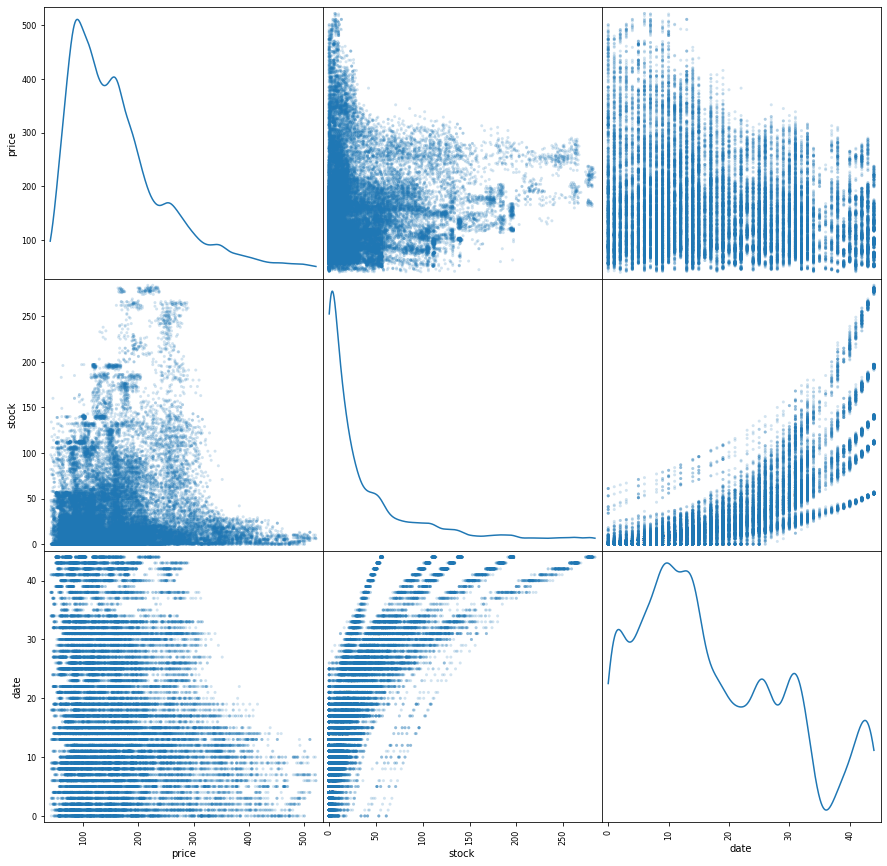

In [7]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
scatter_matrix(data[["price","stock","date"]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

### Observations :

Ligne 1 :

prix en fonction du stock : prix + élevé quand stock tout petit. Passé un stock de 50 chambres dispo, peu de variation du prix. corrélation = 0.2 environ

prix en fonction de la date : prix + élevé quand date + petite. Passé 20 jours, peu de variation du prix. corrélation = -0.2 environ

Ligne 2 :

stock en fonction de la date : stock augmente avec la date. corrélation = 0.8 environ

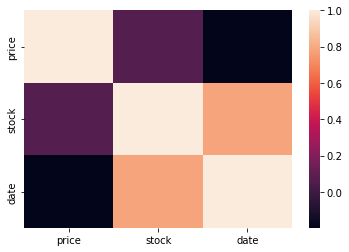

In [8]:
correlation_mat = data[["price","stock","date"]].corr()

import seaborn as sns
sns.heatmap(correlation_mat, annot = False)

plt.show()

### Analyse à ajouter pour déterminer les features les + importantes, etc...

Analyse factorielle discriminante ?

## Extraction des échantillons d'apprentissage et de validation

In [9]:
data.head()

,order_requests,nb_requete,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,1,1,859,134.0,58,valletta,30,portuguese,0,65736,Independant,Independant,0,0,0
1,1,1,719,155.0,97,valletta,30,portuguese,0,65736,Yin Yang,Royal Lotus,0,0,0
2,1,1,160,94.0,21,valletta,30,portuguese,0,65736,Independant,Independant,1,0,0
3,1,1,504,158.0,74,valletta,30,portuguese,0,65736,Morriott International,Morriot,0,0,0
4,1,1,295,73.0,21,valletta,30,portuguese,0,65736,Yin Yang,8 Premium,0,0,0


### Xtrain avec conversion des variables catégorielles en dummy/indicator variables

Utilisation de OneHotEncoder au lieu de pd.get_dummies

In [10]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()  
#scaler.fit(X_train)  
#Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
#Xr_val = scaler.transform(X_val)

In [11]:
from sklearn.preprocessing import OneHotEncoder
X=data[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]]
enc = OneHotEncoder()
enc.fit(X)
enc.categories_

[array(['amsterdam', 'copenhagen', 'madrid', 'paris', 'rome', 'sofia',
        'valletta', 'vienna', 'vilnius'], dtype=object),
 array(['austrian', 'belgian', 'bulgarian', 'croatian', 'cypriot', 'czech',
        'danish', 'dutch', 'estonian', 'finnish', 'french', 'german',
        'greek', 'hungarian', 'irish', 'italian', 'latvian', 'lithuanian',
        'luxembourgish', 'maltese', 'polish', 'portuguese', 'romanian',
        'slovakian', 'slovene', 'spanish', 'swedish'], dtype=object),
 array([0, 1]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  8

In [12]:
Xenc=enc.transform(X).toarray()
Xenc

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [13]:
dataDum=pd.DataFrame(Xenc)
dataDum

,0,1,2,3,4,5,6,7,8,9,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
39327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
39328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
39329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
dataQuant = data[["stock","date"]]
#dataDum = pd.get_dummies(data[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]])
dfC = pd.concat([dataQuant,dataDum],axis=1)
dfC.head()

,stock,date,0,1,2,3,4,5,6,7,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
0,58,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,97,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,21,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,74,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,21,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [15]:
Y = data[["price"]]
Y.head()

,price
0,134.0
1,155.0
2,94.0
3,158.0
4,73.0


In [16]:
#len(Xtrain)
dfC.shape

(39331, 1068)

In [17]:
len(Y)

39331

In [18]:
from sklearn.model_selection import train_test_split  
#test_size = échantillon test de taille ... parmi les ... observations (20 %)
longueur = int(0.2*len(Y))
X_train,X_val,Y_train,Y_val=train_test_split(dfC,Y,test_size=longueur,random_state=11)

In [19]:
print(X_train.shape,len(Y_train))

(31465, 1068) 31465


In [20]:
X_train

,stock,date,0,1,2,3,4,5,6,7,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
7430,12,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
14166,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
12816,24,22,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4806,68,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
13867,28,25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32081,0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7259,168,31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
21584,31,26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
36543,11,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [21]:
Ytrain = np.ravel(Y_train)
Ytrain

array([155.,  72., 162., ..., 121.,  72., 159.])

### Standardisation des données?
Inutile pour RandomForest / utile pour XGBoost?

Si oui à faire sur l'échantillon test du Defi

In [22]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()  
#scaler.fit(X_train)  
#Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
#Xr_val = scaler.transform(X_val)

## Modélisation avec une forêt aléatoire

In [23]:
#help(RandomForestRegressor)
#help(forest.fit)

Premier modèle avec 100 arbres dans la forêt et 2 variables tirées aléatoirement lors de la construction de chq noeud.

In [24]:
from sklearn.ensemble import RandomForestRegressor
# définition des paramètres
forest = RandomForestRegressor(n_estimators=100, 
   criterion='mse', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(X_train,Ytrain)
print(rfFit.oob_score_) #proportion de bonnes prédictions avec l'échantillon train

0.9929509790557404


MSE et R2 score sur l'échantillon test :

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
prev=rfFit.predict(X_val)
print("MSE=",mean_squared_error(Y_val,prev))
print("R2=",r2_score(Y_val,prev))

MSE= 48.388114884655025
R2= 0.9927734735858833


Optimisation par validation croisée du nombre d'arbres dans la forêts et du nombre de variables tirées aléatoirement lors de la construction de chaque noeud. PLUS TARD

In [26]:
#param=[{"n_estimators":list(range(100,500,100)),"max_features":list(range(2,10,1))}]
#rf= GridSearchCV(RandomForestRegressor(),
#        param,cv=10,n_jobs=-1)
#rfOpt=rf.fit(Xr_train, Yr_train)
# paramètre optimal
#print("Meilleur score = %f, Meilleur paramètre = %s" % (rfOpt.best_score_,rfOpt.best_params_))

In [27]:
prev0=np.around(prev, decimals=1)
prev0

array([ 90.3, 278.4, 190. , ...,  89.5,  81.6, 197.1])

In [28]:
len(prev0)
indice0 = pd.DataFrame(np.arange(0,len(prev0)),columns = ['index'])
indice0

,index
0,0
1,1
2,2
3,3
4,4
...,...
7861,7861
7862,7862
7863,7863
7864,7864


In [29]:
price0=pd.DataFrame(prev0,columns = ['price'])
price0

,price
0,90.3
1,278.4
2,190.0
3,302.3
4,80.4
...,...
7861,352.3
7862,170.2
7863,89.5
7864,81.6


In [30]:
sub0=indice0.join(price0, on=None, how='right', lsuffix='', rsuffix='', sort=False)
sub0

,index,price
0,0,90.3
1,1,278.4
2,2,190.0
3,3,302.3
4,4,80.4
...,...,...
7861,7861,352.3
7862,7862,170.2
7863,7863,89.5
7864,7864,81.6


In [31]:
sub0.to_csv('./Y_val.csv', index= False)

## Prédiction sur les données test (à mettre dans un autre fichier qd on passera en .py)

In [32]:
import pandas as pd
import numpy as np
import panel as pn

%matplotlib inline
import matplotlib.pyplot as plt

test = pd.read_csv('./defi-ia-2023/test_set.csv')
test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42


In [33]:
hotels = pd.read_csv('./defi-ia-2023/features_hotels.csv', index_col=['hotel_id', 'city'])
test = test.join(hotels, on=['hotel_id', 'city'])
test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,Accar Hotels,Safitel,1,1,1


In [34]:
len(test)

6644

In [35]:
test.dtypes

index               int64
order_requests      int64
city               object
date                int64
language           object
mobile              int64
avatar_id           int64
hotel_id            int64
stock               int64
group              object
brand              object
parking             int64
pool                int64
children_policy     int64
dtype: object

In [36]:
#On affecte le bon type aux variables qualitatives
test["city"]=pd.Categorical(test["city"],ordered=False)
test["language"]=pd.Categorical(test["language"],ordered=False)
test["group"]=pd.Categorical(test["group"],ordered=False)
test["brand"]=pd.Categorical(test["brand"],ordered=False)

test["mobile"]=pd.Categorical(test["mobile"],ordered=False)
test["parking"]=pd.Categorical(test["parking"],ordered=False)
test["pool"]=pd.Categorical(test["pool"],ordered=False)
test["children_policy"]=pd.Categorical(test["children_policy"],ordered=False)

test["hotel_id"]=pd.Categorical(test["hotel_id"],ordered=False)
test["avatar_id"]=pd.Categorical(test["avatar_id"],ordered=False)

#test["price"]=pd.DataFrame(test["price"], dtype=float)

test.dtypes
#test.head()

index                 int64
order_requests        int64
city               category
date                  int64
language           category
mobile             category
avatar_id          category
hotel_id           category
stock                 int64
group              category
brand              category
parking            category
pool               category
children_policy    category
dtype: object

In [37]:
T=test[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]]
Tenc=enc.transform(T).toarray()
Tenc

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [38]:
testDum=pd.DataFrame(Tenc)
testDum

,0,1,2,3,4,5,6,7,8,9,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [39]:
testQuant = test[["stock","date"]]
#testDum = pd.get_dummies(test[["city","language","mobile","hotel_id","group","brand","parking","pool","children_policy"]])
Xtest = pd.concat([testQuant,testDum],axis=1)
Xtest.head()

,stock,date,0,1,2,3,4,5,6,7,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
0,46,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,32,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,12,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,10,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,42,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [40]:
Xtest.shape

(6644, 1068)

In [41]:
Yprev=rfFit.predict(Xtest)

In [42]:
Yprev0=np.around(Yprev, decimals=1)
Yprev0

array([113.8, 140. ,  56.3, ..., 148. , 181.7, 147.3])

In [43]:
len(Yprev0)
Yindice = pd.DataFrame(np.arange(0,len(Yprev0)),columns = ['index'])
Yindice

,index
0,0
1,1
2,2
3,3
4,4
...,...
6639,6639
6640,6640
6641,6641
6642,6642


In [44]:
Yprice=pd.DataFrame(Yprev0,columns = ['price'])
Yprice

,price
0,113.8
1,140.0
2,56.3
3,53.7
4,219.3
...,...
6639,75.3
6640,256.5
6641,148.0
6642,181.7


In [45]:
Ysub=Yindice.join(Yprice, on=None, how='right', lsuffix='', rsuffix='', sort=False)
Ysub

,index,price
0,0,113.8
1,1,140.0
2,2,56.3
3,3,53.7
4,4,219.3
...,...,...
6639,6639,75.3
6640,6640,256.5
6641,6641,148.0
6642,6642,181.7


In [46]:
Ysub.to_csv('./sample_submission.csv', index= False)

In [47]:
len(Ysub)

6644